In [60]:
import copy
import datetime

import streamlit as st
import numpy as np
import pandas as pd
import yfinance as yf
import pypfopt
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import plotting

from pypfopt import risk_models
import seaborn as sn
import matplotlib.pyplot as plt

In [61]:
tickers = ['SPY','AAPL','JPM','MSFT']

In [62]:
data =yf.download(tickers, start='2020-01-01', end='2021-12-31')

[*********************100%***********************]  5 of 5 completed


In [63]:
data.head()

Adj Close                                                 \
                 AAPL         GE         JPM        MSFT         SPY   
Date                                                                   
2020-01-02  73.785912  94.574493  131.048004  156.924377  312.395050   
2020-01-03  73.068558  94.891586  129.318634  154.970413  310.029541   
2020-01-06  73.650795  96.239258  129.215805  155.370956  311.212311   
2020-01-07  73.304413  95.525780  127.019035  153.954346  310.337219   
2020-01-08  74.483604  94.653763  128.009918  156.406601  311.991211   

                Close                                                 ...  \
                 AAPL         GE         JPM        MSFT         SPY  ...   
Date                                                                  ...   
2020-01-02  75.087502  95.440002  141.089996  160.619995  324.869995  ...   
2020-01-03  74.357498  95.760002  138.339996  158.619995  322.410004  ...   
2020-01-06  74.949997  97.120003  138.229996  159.029999  323.640015  ...   
2020-01-07  74.597504  96.400002  135.880005  157.580002  322.730011  ...   
2020-01-08  75.797501  95.519997  136.940002  160.089996  324.450012  ...   

                 Open                                                 \
                 AAPL         GE         JPM        MSFT         SPY   
Date                                                                   
2020-01-02  74.059998  89.839996  139.789993  158.779999  323.540009   
2020-01-03  74.287498  92.559998  137.500000  158.320007  321.160004   
2020-01-06  73.447502  94.720001  136.559998  157.080002  320.489990   
2020-01-07  74.959999  97.199997  137.279999  159.320007  323.019989   
2020-01-08  74.290001  95.919998  135.699997  158.929993  322.940002   

               Volume                                          
                 AAPL        GE       JPM      MSFT       SPY  
Date                                                           
2020-01-02  135480400  10927725  10803700  22622100  59151200  
2020-01-03  146322800  10735725  10386800  21116200  77709700  
2020-01-06  118387200  13993588  10259000  20813700  55653900  
2020-01-07  108872000   8822413  10531300  21634100  40496400  
2020-01-08  132079200   6925313   9695300  27746500  68296000  

[5 rows x 30 columns]

In [64]:
data2 = data['Adj Close']

In [65]:
mu = expected_returns.mean_historical_return(data2)

In [70]:
cov = risk_models.sample_cov(data2)

In [72]:
ef = EfficientFrontier(mu, cov, weight_bounds=(0,1))

TypeError: '>=' not supported between instances of 'odict_items' and 'int'

OptimizationError: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')

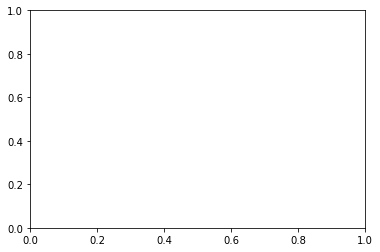

In [68]:
fig, ax = plt.subplots()
ef_max_sharpe = copy.deepcopy(ef)
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False, zorder=10)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance(verbose=True)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="orange", label="Max Sharpe", zorder=20)

# Generate random portfolios
n_samples = 8000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="cool", zorder=0)

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()